#  Student; Rens Ithurbure

## Research Questions

### Main Research Question
As a data scientist for Netflix, how can we improve our recommenders system to increase the customer satisfaction and retention.

### Sub-questions
1. Which features are suitable for building our recommenders system?
2. Is it possible to make predictions what rating users will give to movies they have never seen before
3. Which collaborative filtering technique (SVD or KNN) is most suitable to improve our recommenders system??

# We import our packages 

In [3]:
import pandas as pd              #this library was used to read the CSV file
import numpy as np               #this library was used for mathematical purposes

import matplotlib.pyplot as plt  #this library was used to plot graphs
import seaborn as sns            #this library was used for visualizations (histograms, boxplots and lineplots)
import scipy.stats as stats      #this library was used to perform T-tests
import statsmodels.api as sm     #this library was used to perform Anova testing
from statsmodels.formula.api import ols #this library was used to perform Anova testing
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
import os  
from io import StringIO                 
from io import StringIO                          

import tarfile


os.chdir
os.getcwd()

'c:\\Users\\rensi\\OneDrive\\Documenten\\python project\\System Development for Marketing (RecSys)\\Netflix'

# We import the first dataframe (movie_titles)

In [4]:
# Read the text file into a dataframe with three columns separated by commas
with open("movie_titles.txt", 'r', encoding='latin-1') as file:
    data = file.read()
rows = data.split('\n')
# Split each row into a list of strings, where each string represents a column in the text file
columns = [row.split(',') for row in rows]
# Convert the list of columns into a Pandas dataframe
df_movie_title = pd.DataFrame(columns)

df_movie_title.head()

0     1                             2     3     4     5
0  1  2003               Dinosaur Planet  None  None  None
1  2  2004    Isle of Man TT 2004 Review  None  None  None
2  3  1997                     Character  None  None  None
3  4  1994  Paula Abdul's Get Up & Dance  None  None  None
4  5  2004      The Rise and Fall of ECW  None  None  None

In [5]:
# Dropping innecesary columns
df_movie_title = df_movie_title.drop([3,4,5], axis = 1)

In [6]:
# Renaming columns
df_movie_title.rename(columns={0: 'movieid', 1: 'release_year', 2: 'title'}, inplace=True)


df_movie_title.head()


movieid release_year                         title
0       1         2003               Dinosaur Planet
1       2         2004    Isle of Man TT 2004 Review
2       3         1997                     Character
3       4         1994  Paula Abdul's Get Up & Dance
4       5         2004      The Rise and Fall of ECW

In [6]:
df_movie_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17771 entries, 0 to 17770
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movieid       17771 non-null  object
 1   release_year  17770 non-null  object
 2   title         17770 non-null  object
dtypes: object(3)
memory usage: 416.6+ KB


In [12]:
df_movie_title.shape

(17771, 3)

# We import our second dataset from the training_set.tar file 

In [52]:
dfs = []
# Open the tar file
with tarfile.open('training_set.tar', 'r') as tar:
    # Iterate over each file in the tar file
    for member in tar.getmembers():
        # Check if the member is a file
        if member.isfile():
            # Extract the file from the tar archive
            file = tar.extractfile(member)
            # Read the first line of the file
            first_line = file.readline().decode().strip()
            # Read the contents of the file into a DataFrame
            df = pd.read_csv(StringIO(file.read().decode()), sep='\t', header=None, names=['text'])
            # Add a new column with the first line(movieID) of the inner file
            df['first_line'] = first_line
            # Do any further processing on the DataFrame as needed
            dfs.append(df)
    
# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

# Save the DataFrame as a feather file
#merged_df.to_feather('data.feather')

In [53]:
merged_df.tail()

text first_line
100480502  2115020,5,2003-08-25     15762:
100480503  1676658,5,2005-06-04     15762:
100480504   128611,3,2004-04-16     15762:
100480505  1300759,4,2004-09-30     15762:
100480506  1552802,3,2004-02-16     15762:

## * Important note;  We reduce the dataset from 100 million rows to 1 million rows
- The laptop could not deal with the entire dataset due memory errors.

In [107]:
# Creating smaller df to handle the dataset
smaller_df = merged_df.iloc[:-99400000]

In [108]:
# Checking # of rows
print(len(smaller_df.index))

1080507


- We solve the comma problem within the movie titles with the code below;

In [109]:
# Split the values in the 'text' column on commas
new_cols = smaller_df['text'].str.split(',', expand=True)

# Add the new columns to the original dataframe
smaller_df[new_cols.columns] = new_cols

# Remove colons from every string in the 'movieID' column
smaller_df['first_line'] = smaller_df['first_line'].str.replace(':', '')

C:\Users\rensi\AppData\Local\Temp\ipykernel_12384\2595100116.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smaller_df[new_cols.columns] = new_cols
C:\Users\rensi\AppData\Local\Temp\ipykernel_12384\2595100116.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smaller_df[new_cols.columns] = new_cols
C:\Users\rensi\AppData\Local\Temp\ipykernel_12384\2595100116.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [110]:
# Dropping text column that is not neccesary anymore
smaller_df = smaller_df.drop('text', axis = 1)

# Renaming columns
smaller_df.rename(columns={0: 'userid', 1: 'rating', 2: 'date', 'first_line': 'movieid' }, inplace=True)

In [111]:
smaller_df.tail()

movieid  userid rating        date
1080502   17243  188613      3  2001-12-02
1080503   17243  289656      1  2001-05-08
1080504   17243  272840      3  2004-05-24
1080505   17243  583086      3  2003-04-17
1080506   17243   21823      2  2004-03-29

In [112]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080507 entries, 0 to 1080506
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   movieid  1080507 non-null  object
 1   userid   1080507 non-null  object
 2   rating   1080507 non-null  object
 3   date     1080507 non-null  object
dtypes: object(4)
memory usage: 33.0+ MB


#### We Merge the Unique movies (smaller df) with the movie_title df and we create a CSV file for the Merged_dfs

In [113]:
# Merging 2 df
merged_dfs = pd.merge(smaller_df, df_movie_title, on='movieid', how='left')
merged_dfs.head()

movieid   userid rating        date release_year  title
0   15802  2071969      4  2005-07-07         1944  Laura
1   15802  1395430      3  2005-07-10         1944  Laura
2   15802   716091      4  2005-07-18         1944  Laura
3   15802  2329101      5  2005-07-20         1944  Laura
4   15802  1017542      4  2005-08-01         1944  Laura

In [115]:
merged_dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080507 entries, 0 to 1080506
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   movieid       1080507 non-null  object
 1   userid        1080507 non-null  object
 2   rating        1080507 non-null  object
 3   date          1080507 non-null  object
 4   release_year  1080507 non-null  object
 5   title         1080507 non-null  object
dtypes: object(6)
memory usage: 57.7+ MB


In [116]:
merged_dfs.shape

(1080507, 6)

In [117]:
merged_dfs.to_csv('smaller_data.csv')


# We import our final_df were we will do the analysis part on

In [4]:
#import .csv smaller dataset
final_df = pd.read_csv('smaller_data.csv')
final_df.head()

Unnamed: 0  movieid   userid  rating        date  release_year  title
0           0    15802  2071969       4  2005-07-07          1944  Laura
1           1    15802  1395430       3  2005-07-10          1944  Laura
2           2    15802   716091       4  2005-07-18          1944  Laura
3           3    15802  2329101       5  2005-07-20          1944  Laura
4           4    15802  1017542       4  2005-08-01          1944  Laura

## No data cleaning needed 

In [17]:
# Looking for missing values
print(final_df.isna().sum()) # count of missing values
print(final_df.isnull().sum()) # count of missing values
final_df = final_df.dropna() # removing rows with missing values

Unnamed: 0      0
movieid         0
userid          0
rating          0
date            0
release_year    0
title           0
dtype: int64
Unnamed: 0      0
movieid         0
userid          0
rating          0
date            0
release_year    0
title           0
dtype: int64


## We start the Exploratory Data analysis (EDA)

In [7]:
final_df.shape

(1080507, 7)

In [6]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080507 entries, 0 to 1080506
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Unnamed: 0    1080507 non-null  int64 
 1   movieid       1080507 non-null  int64 
 2   userid        1080507 non-null  int64 
 3   rating        1080507 non-null  int64 
 4   date          1080507 non-null  object
 5   release_year  1080507 non-null  int64 
 6   title         1080507 non-null  object
dtypes: int64(5), object(2)
memory usage: 57.7+ MB


##### Checking the rating distribution

#### * We will use a counplot to get a sense of how the ratings are distributed

- Conclusion; The most users in the dataset rated the movies with 3 or higher.

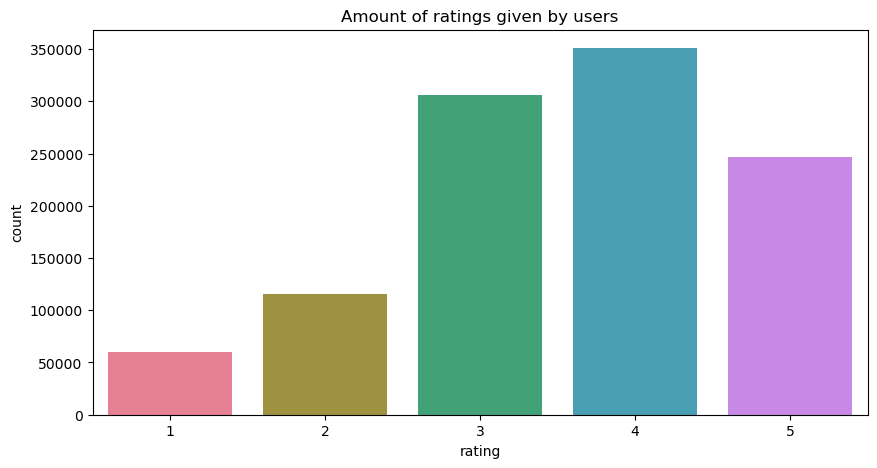

In [16]:
#create Countplot total movie ratings given divided in rating 1 to 5
plt.figure(figsize= (10, 5))
sns.countplot(data= final_df, x = "rating", palette= "husl").set(title= "Amount of ratings given by users" )


plt.show()

##### * Ploting the 15 most frequent & less frequent rated movies in the dataset

- Conclusion 1; Harry Potter and the sorcerer's stone is the most frequent rated movie in our dataset 
- Conclusion 2; Harry Potter and the sorcerer's stone is the movie with the less ratings in our dataset 
- Side note; The data is smaller, since we could not import the entire dataset. This could manipulate these results

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'The X-Files: Fight the Future'),
  Text(0, 1, 'The Bad News Bears'),
  Text(0, 2, 'Confessions of a Teenage Drama Queen'),
  Text(0, 3, 'Treasure Planet'),
  Text(0, 4, 'The Rocky Horror Picture Show'),
  Text(0, 5, "Pee-Wee's Big Adventure"),
  Text(0, 6, 'Get Shorty'),
  Text(0, 7, 'Open Range'),
  Text(0, 8, 'Cool Hand Luke'),
  Text(0, 9, 'Unbreakable'),
  Text(0, 10, '28 Days Later'),
  Text(0, 11, 'Coyote Ugly'),
  Text(0, 12, 'GoodFellas: Special Edition'),
  Text(0, 13, 'Mona Lisa Smile'),
  Text(0, 14, "Harry Potter and the Sorcerer's Stone")])

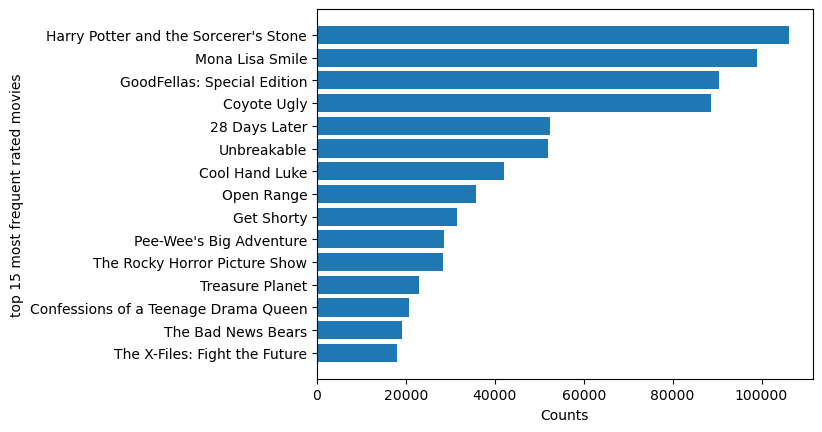

In [18]:
# The top 15 most frwquent rated movies
Movies_counts = final_df['title'].value_counts()

# top 15 Movies
n = 15

# selecting top 15 most frequent rated movies
top_movies = Movies_counts[:n]


# descending order
top_movies = top_movies.iloc[::-1]

# create horizontal diagram
fig, ax = plt.subplots()
bars = ax.barh(top_movies.index, top_movies.values)

# adding labels
plt.ylabel("top 15 most frequent rated movies")
plt.xlabel("Counts")

# rotate  y-axis labels 
plt.yticks(rotation=0)


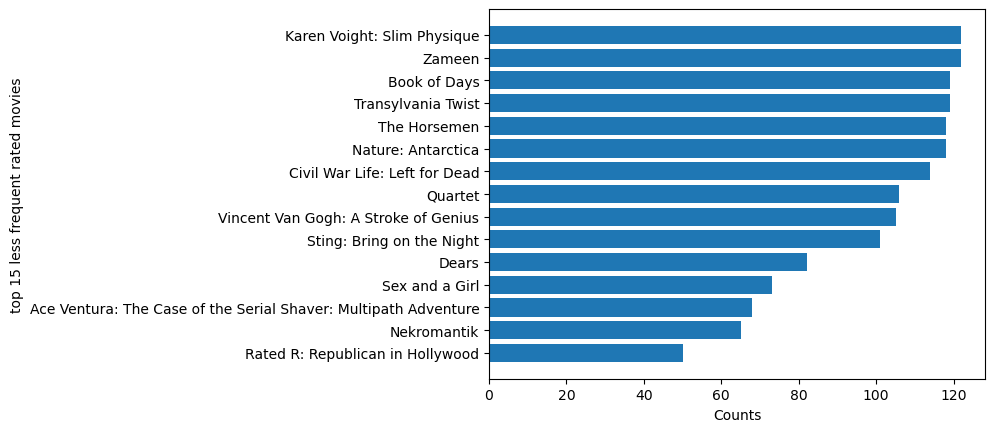

In [19]:
# Amount of unique rated movies by users
movies_counts = final_df['title'].value_counts()

# bottom 15 theme parks
n = 15

# selecting bottom 15 less frequent rated movies
bottom_movies = movies_counts[-n:]

# descending order
bottom_movies = bottom_movies.iloc[::-1]

# create horizontal diagram
fig, ax = plt.subplots()
bars = ax.barh(bottom_movies.index, bottom_movies.values)

# aaing labels
plt.ylabel("top 15 less frequent rated movies")
plt.xlabel("Counts")

# rotate y-axis labels
plt.yticks(rotation=0)


plt.show()

##### * Ploting the 15 best rated & less rated movies based on the average rating score given.
- Conclusion 1: Farscape 3: Season 3 is the best rated movie on average
- Conclusion 2: Visions of Sugarplums is the worse rated movie on average


C:\Users\rensi\AppData\Local\Temp\ipykernel_12192\2923026867.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(highest_rated_movies.index, rotation=45, ha='right')


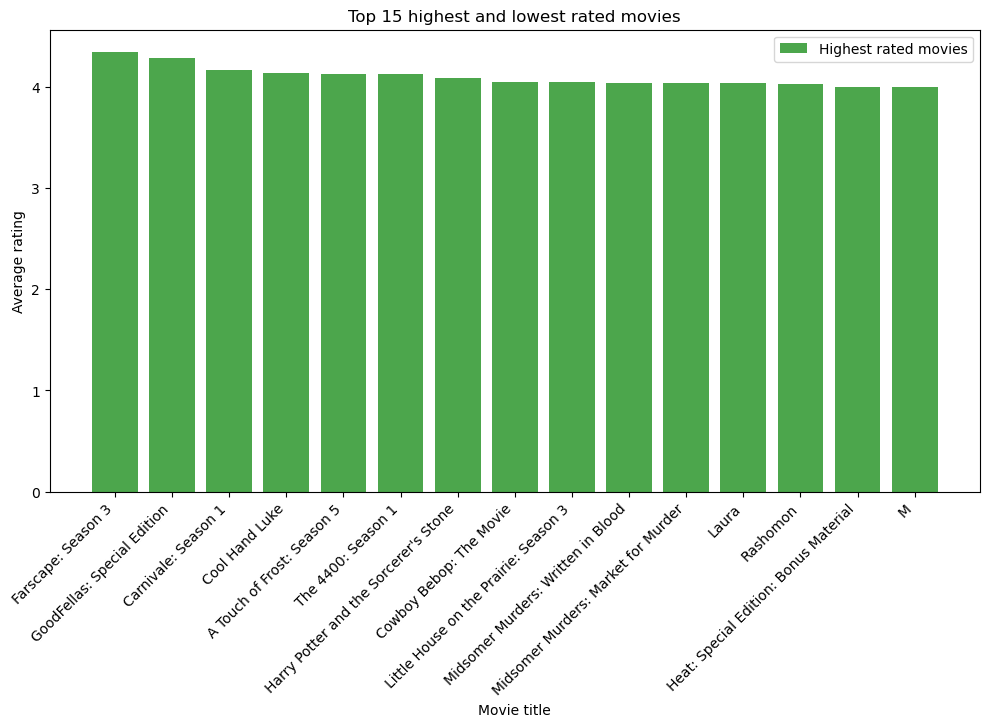

In [20]:
# Group the dataset by movie and calculate the average rating for each movie
movie_ratings = final_df.groupby('title')['rating'].mean()

# Sort the resulting groupby object by rating in descending order to get the highest rated movies at the top
highest_rated_movies = movie_ratings.sort_values(ascending=False)

# Select the top 15 highest rated movies
top_n = 15
highest_rated_movies = highest_rated_movies.head(top_n)

# Sort the resulting subset of the data by rating in ascending order to plot the highest rated movies first
highest_rated_movies = highest_rated_movies.sort_values(ascending= False)



# Create a bar plot with the movie titles on the x-axis and the average ratings on the y-axis
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(highest_rated_movies.index, highest_rated_movies.values, color='green', alpha=0.7, label='Highest rated movies')

ax.set_xticklabels(highest_rated_movies.index, rotation=45, ha='right')
ax.set_xlabel('Movie title')
ax.set_ylabel('Average rating')
ax.set_title('Top {} highest and lowest rated movies'.format(top_n))
ax.legend()
plt.show()

C:\Users\rensi\AppData\Local\Temp\ipykernel_12192\3350770823.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(lowest_rated_movies.index, rotation=45, ha='right') # Change to lowest rated movies index


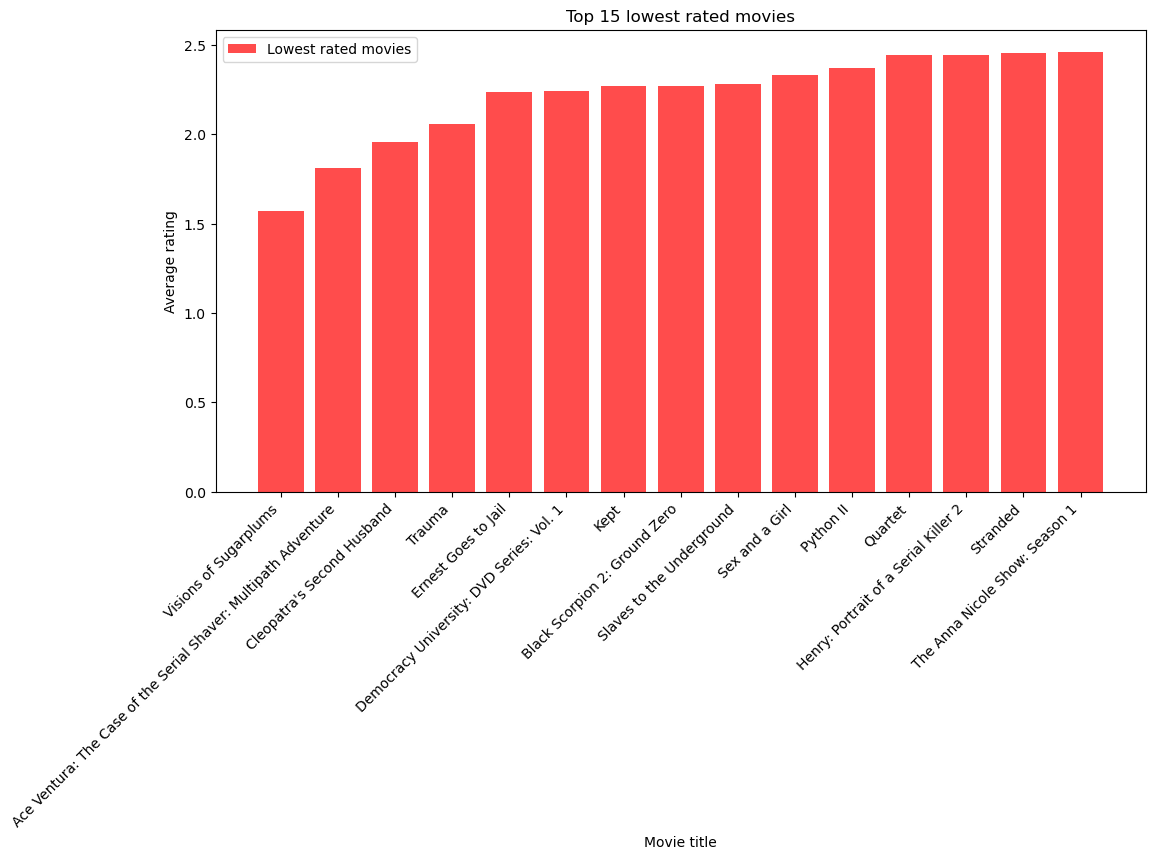

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))


# Group the dataset by movie and calculate the average rating for each movie
movie_ratings = final_df.groupby('title')['rating'].mean()

# Sort the resulting groupby object by rating in ascending order to get the lowest rated movies at the top
lowest_rated_movies = movie_ratings.sort_values()


# Select the top 15 lowest rated movies
top_n = 15
lowest_rated_movies = lowest_rated_movies.head(top_n)

# Sort the resulting subset of the data by rating in ascending order to plot the lowest rated movies first
lowest_rated_movies = lowest_rated_movies.sort_values()


ax.bar(lowest_rated_movies.index, lowest_rated_movies.values, color='red', alpha=0.7, label='Lowest rated movies')
ax.set_xticklabels(lowest_rated_movies.index, rotation=45, ha='right') # Change to lowest rated movies index
ax.set_xlabel('Movie title')
ax.set_ylabel('Average rating')
ax.set_title('Top {} lowest rated movies'.format(top_n))
ax.legend()
plt.show()

#### This plot shows the amount of movies released through the years


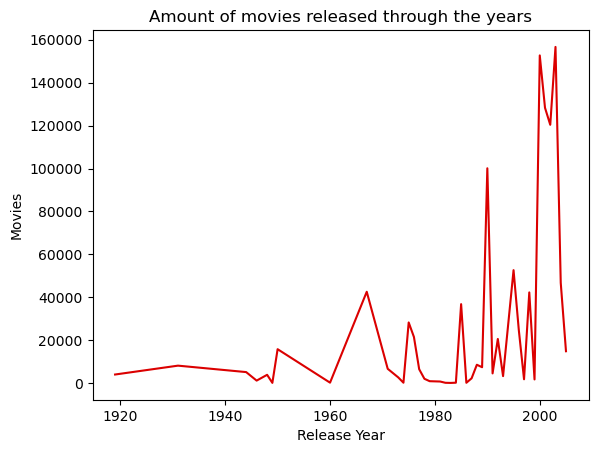

In [9]:
# Get the movie release data and group them by year
data = final_df['release_year'].value_counts().sort_index()

# Create a line plot
plt.plot(data.index, data.values, color='#db0000')

# Set the title and axis labels
plt.title('Amount of movies released through the years' )
plt.xlabel('Release Year')
plt.ylabel('Movies')

# Display the plot
plt.show()

#### Distribution of Ratings per Movie

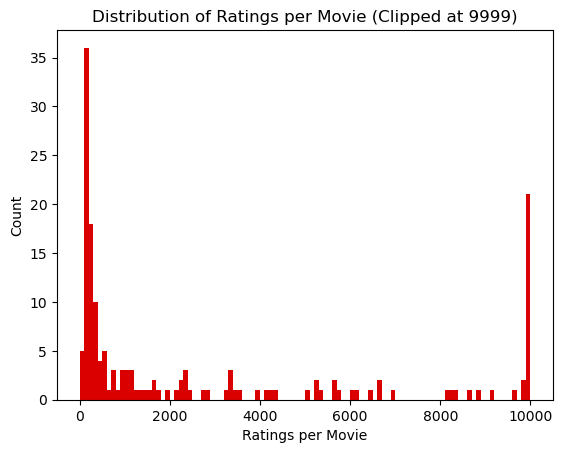

In [24]:
# Ratings per movie
data_movie = final_df['movieid'].value_counts().clip(upper=9999)
plt.hist(data_movie, bins=100, range=(0, 10000), color='#db0000')
plt.title('Distribution of Ratings per Movie (Clipped at 9999)')
plt.xlabel('Ratings per Movie')
plt.ylabel('Count')
plt.show()

#### Plot that shows the distribtuion of Ratings per user

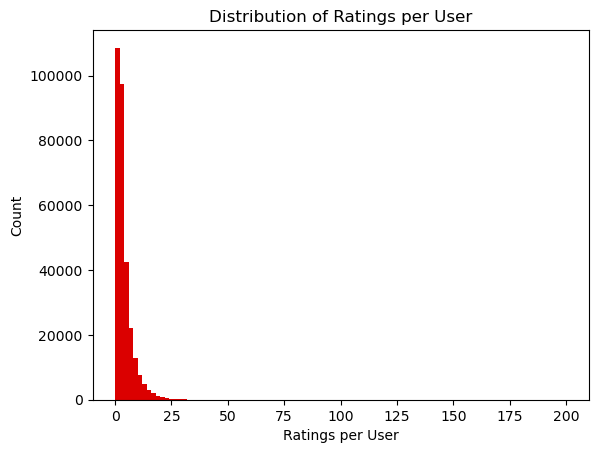

In [25]:
# Ratings per user
data_user = final_df['userid'].value_counts().clip(upper=199)
plt.hist(data_user, bins=100, range=(0, 200), color='#db0000')
plt.title('Distribution of Ratings per User')
plt.xlabel('Ratings per User')
plt.ylabel('Count')
plt.show()

#### Plot that shows the distribution of Ratings per user

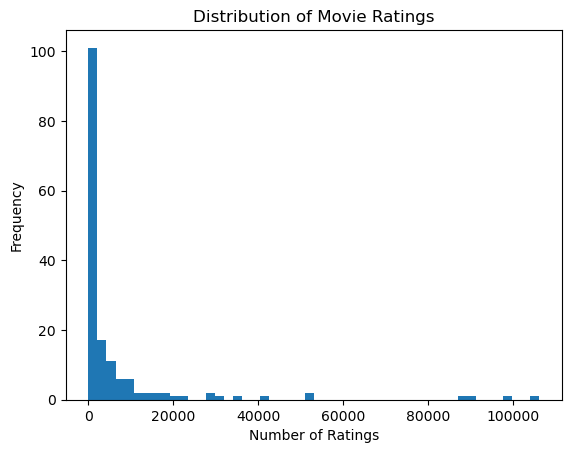

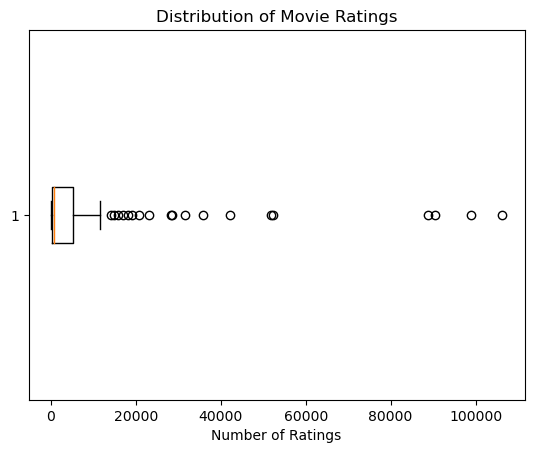

In [26]:
# Count the number of ratings for each movie
movie_ratings = final_df.groupby('movieid')['rating'].count()

# Plot a histogram of movie ratings
plt.hist(movie_ratings, bins=50)
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

# Plot a box plot of movie ratings
plt.boxplot(movie_ratings, vert=False)
plt.xlabel('Number of Ratings')
plt.title('Distribution of Movie Ratings')
plt.show()

## Slicing the data; 
Reducing the dataset in size will help us load the data quicker, since this dataset is huge. Additionally this will improve the efficiency and statistical significance of this model.
- Conclusion 1: We will remove the movies with too little reviews
- Conclusion 2: We will remove customers who give too little reviews
- They will removed because they are not as relevant as the popular and active customers in this dataset.

In [10]:
# Count the number of ratings per user
user_counts = final_df['userid'].value_counts()

# Print the number of users with less than 10 ratings
print("Number of users with less than 10 ratings:", len(user_counts[user_counts < 10]))

Number of users with less than 10 ratings: 283261


In [28]:
# Count the number of ratings per movie
movie_counts = final_df['movieid'].value_counts()

# Get the indices of movies with less than 10 ratings
less_than_10 = movie_counts.index[movie_counts < 10]

# Print the number of movies with less than 10 ratings
print("Number of movies with less than 10 ratings:", len(less_than_10))

Number of movies with less than 10 ratings: 0


In [4]:
# Count the number of ratings per user
user_counts = final_df['userid'].value_counts()

# Count the number of ratings per movie
movie_counts = final_df['movieid'].value_counts()

# Slice final_df to keep only data with at least 10 ratings per user and per movie
final_df = final_df[final_df['userid'].isin(user_counts[user_counts >= 10].index)]
final_df = final_df[final_df['movieid'].isin(movie_counts[movie_counts >= 10].index)]

Conclusion: Looking at the distribution plot of user ratings, you will see the users who rated less then 10 movies are being dropped now.

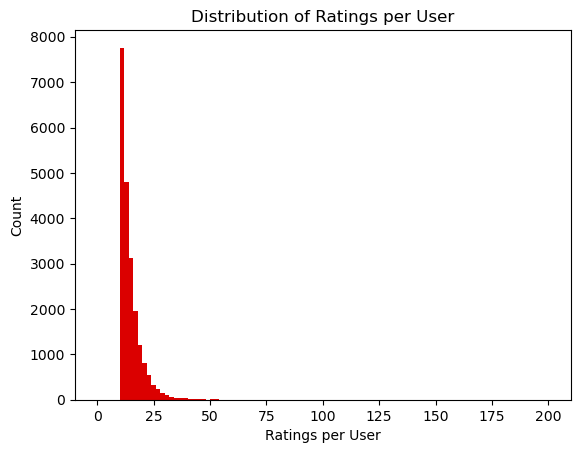

In [6]:
# Ratings per user
data_user = final_df['userid'].value_counts().clip(upper=199)
plt.hist(data_user, bins=100, range=(0, 200), color='#db0000')
plt.title('Distribution of Ratings per User')
plt.xlabel('Ratings per User')
plt.ylabel('Count')
plt.show()

Conclusion: Looking at the distribution plot of movies ratings. you will see the movies with little than 10 ratings are being dropped now.

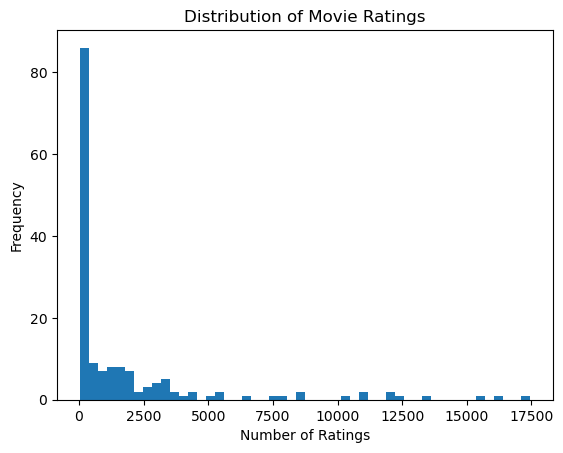

In [31]:
# Count the number of ratings for each movie

# Plot a histogram of movie ratings
movie_ratings = final_df.groupby('movieid')['rating'].count()
plt.hist(movie_ratings, bins=50)
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

### Correlation methods
- Correlation matrix
- Pearson correlation method

C:\Users\rensi\AppData\Local\Temp\ipykernel_12192\3570558661.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = final_df.corr()


              Unnamed: 0   movieid    userid    rating  release_year
Unnamed: 0      1.000000  0.147296 -0.000715 -0.046481      0.101195
movieid         0.147296  1.000000 -0.000152 -0.004064      0.157445
userid         -0.000715 -0.000152  1.000000  0.000899      0.000430
rating         -0.046481 -0.004064  0.000899  1.000000     -0.119970
release_year    0.101195  0.157445  0.000430 -0.119970      1.000000


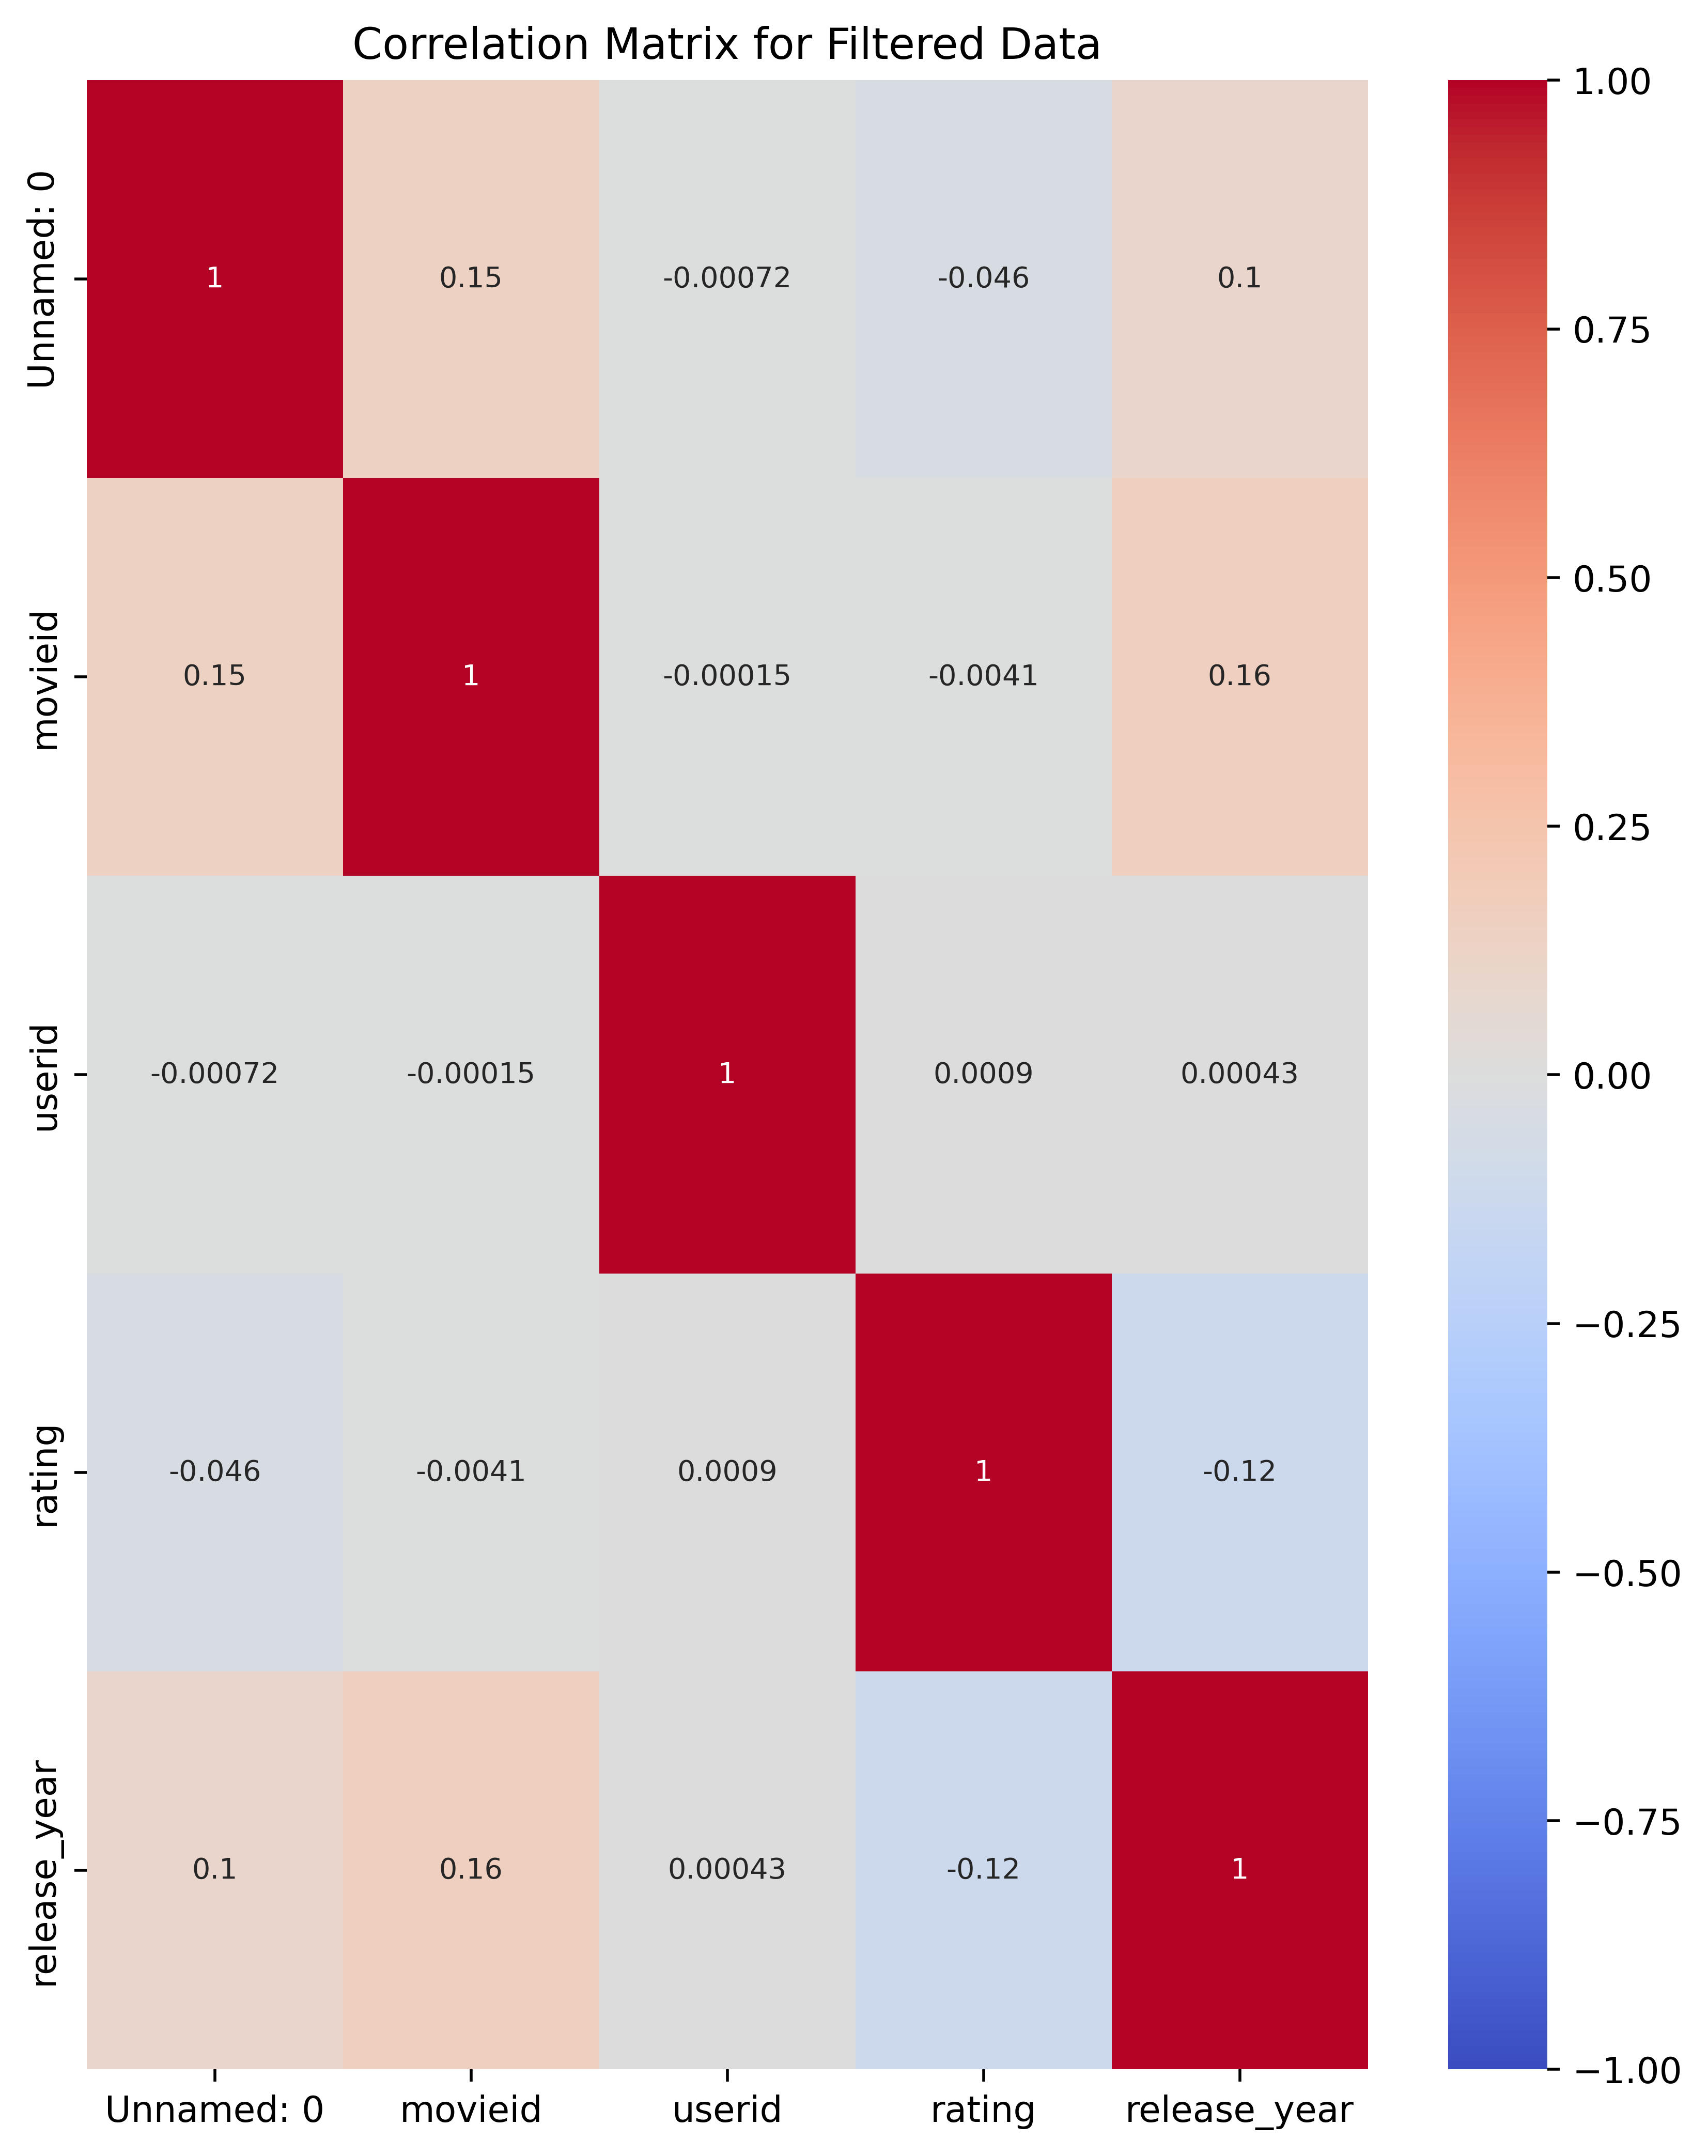

In [33]:
# Calculate correlation matrix for the filtered_data DataFrame
correlation_matrix = final_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
fig, ax = plt.subplots(figsize=(8, 10), dpi=500)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax, annot_kws={'fontsize': 8})

# Set the title for the heatmap
ax.set_title('Correlation Matrix for Filtered Data')

plt.show()

#### Pearson correlation method

Conclusion; There are no significant correlations between the features. 

In [14]:
cont_var = ['rating', 'release_year', 'userid', 'movieid']
pearson = final_df[cont_var].corr(method='pearson')
print(round(pearson,3))

              rating  release_year  userid  movieid
rating         1.000        -0.117   0.001    0.024
release_year  -0.117         1.000  -0.001    0.221
userid         0.001        -0.001   1.000    0.000
movieid        0.024         0.221   0.000    1.000


#### Spearman's rank correlation method
 Conclusion; 
- There is slight negative correlation between the 'rating' and release_year'
- There is no significant correlation between 'rating' and 'userid'
- There is a slight positive correlation between 'rating and 'movieid'

In [35]:
# Checking correlation among the continuous variables using Spearman's rank correlation coefficient

cont_var = ['rating', 'release_year', 'userid', 'movieid', ]
final_df[cont_var].corr(method='spearman')

rating  release_year    userid   movieid
rating        1.000000     -0.096422  0.000927 -0.004940
release_year -0.096422      1.000000  0.001015  0.211648
userid        0.000927      0.001015  1.000000  0.000012
movieid      -0.004940      0.211648  0.000012  1.000000

## Feature Engineering

### Splitting the data into Train, Test and validation set 

In [38]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(final_df, test_size=0.2, random_state=42)

df_train, df_val = train_test_split(train_data, test_size=0.25, random_state = 42)
# Print the shapes of the training and testing sets
print("Shape of training data:", train_data.shape)
print("Shape of testing data:", test_data.shape)
print("Shape of validation data:", df_val.shape)

Shape of training data: (242291, 7)
Shape of testing data: (60573, 7)
Shape of validation data: (60573, 7)


## Collaborative filtering  ~ K-Nearest Neighbors 
The goal is to find similar movies based on ratings given by others users (user to user)


- KNN = A filtering machine learning technique for classification or regression. 
- The algorithm will look for the k-nearest data points in the train dataset to ultimately predict the label or value based on the values of the k-nearest neighbor values. 
- We will create a pivot table for the features we want to use
- Then, we create a movie_user matrix. The moviesid's will be on the row side and the userid's will be on the column side. The values to fill this matrix will be the ratings given by all the users. 
(We want to compare movies based on its ratings)
- Conclusion: We will notice a lot of Nan-values, which means that these  movies are not rated by the particular users because they have not seen these movies. 
 Since we can not work with Nan values we will need to fill them with zeros.

In [41]:
# pivot the dataframe final_df to create a matrix of users, movies and ratings.
final_df.pivot(index = "userid", columns = "movieid", values = "rating")

movieid  8      14     152    226    424    688    749    1060   1348   1514   \
userid                                                                          
769        NaN    NaN    NaN    NaN    2.0    NaN    NaN    NaN    NaN    NaN   
906        NaN    NaN    NaN    NaN    3.0    NaN    NaN    NaN    NaN    NaN   
1333       3.0    NaN    NaN    NaN    3.0    NaN    NaN    3.0    NaN    NaN   
1442       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1897       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2648853    NaN    NaN    3.0    NaN    NaN    NaN    NaN    NaN    NaN    1.0   
2648869    NaN    NaN    NaN    NaN    2.0    NaN    NaN    NaN    NaN    NaN   
2648885    NaN    NaN    NaN    NaN    5.0    NaN    NaN    NaN    NaN    5.0   
2649120    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2649285    NaN    NaN    3.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

movieid  ...  16142  16445  16827  16898  17147  17243  17315  17603  17604  \
userid   ...                                                                  
769      ...    NaN    3.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
906      ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1333     ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1442     ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1897     ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2648853  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2648869  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2648885  ...    NaN    NaN    NaN    NaN    NaN    3.0    NaN    NaN    NaN   
2649120  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2649285  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

movieid  17627  
userid          
769        3.0  
906        3.0  
1333       2.0  
1442       5.0  
1897       5.0  
...        ...  
2648853    3.0  
2648869    4.0  
2648885    4.0  
2649120    NaN  
2649285    3.0  

[21292 rows x 162 columns]

  Filling the missing values with zero, since we want to calculate the distances between the rating vectors.

In [42]:
# pivot the dataframe final_df to create a matrix of users, movies and ratings.
final_df.pivot(index = "userid", columns = "movieid", values = "rating").fillna(0)

movieid  8      14     152    226    424    688    749    1060   1348   1514   \
userid                                                                          
769        0.0    0.0    0.0    0.0    2.0    0.0    0.0    0.0    0.0    0.0   
906        0.0    0.0    0.0    0.0    3.0    0.0    0.0    0.0    0.0    0.0   
1333       3.0    0.0    0.0    0.0    3.0    0.0    0.0    3.0    0.0    0.0   
1442       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1897       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2648853    0.0    0.0    3.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
2648869    0.0    0.0    0.0    0.0    2.0    0.0    0.0    0.0    0.0    0.0   
2648885    0.0    0.0    0.0    0.0    5.0    0.0    0.0    0.0    0.0    5.0   
2649120    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2649285    0.0    0.0    3.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

movieid  ...  16142  16445  16827  16898  17147  17243  17315  17603  17604  \
userid   ...                                                                  
769      ...    0.0    3.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
906      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1333     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1442     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1897     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2648853  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2648869  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2648885  ...    0.0    0.0    0.0    0.0    0.0    3.0    0.0    0.0    0.0   
2649120  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2649285  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

movieid  17627  
userid          
769        3.0  
906        3.0  
1333       2.0  
1442       5.0  
1897       5.0  
...        ...  
2648853    3.0  
2648869    4.0  
2648885    4.0  
2649120    0.0  
2649285    3.0  

[21292 rows x 162 columns]

#### We will convert this dataframe into a matrix with the csr matrix functions.
- Transform to spare matrix for more efficient calculations

In [43]:
from scipy.sparse import csr_matrix # Compressed Sparse Row matrix

#create a sparse matrix with the users as rows, the movies as columns and the ratings as values
sparse_matrix = csr_matrix((final_df['rating'], (final_df['userid'], final_df['movieid'])))  

### KNN step 1) Building a KNN filtering technique 







- The internal process of the KNN model is to find a distance formula to calculate the distances between the different vectors in our dataset.
There are multiple formulas to calculate the distance between two different vectors
- In this model we picked the cosine distance approach

- We use the algorithm = 'brute' in our model. To be able to calculate the distance between one point and all the other points in the matrix, we will need to navigate through all the different vectors to calculate the distance between each of them. 
<br> Brute helps us to take one data point and comparing this point with all the other data points in the dataset (matrix).

- We use n_neigbors to tell the model how many neigbors we want to keep for our recommendations. We choose n_neigbors = 20 , which means we will consider 20 nearest neigbors to predict the new data point.

In [ ]:
import pandas as pd
from surprise import Reader, Dataset
from surprise import KNNBasic, SVD
from surprise.model_selection import train_test_split
from scipy.sparse import csr_matrix
import fuzzywuzzy as fuzz  # Package for collection string matching alogorithms 

In [46]:
from sklearn.neighbors import NearestNeighbors
# Create a model to find similar movies
# We will use the cosine similarity metric to find the nearest neighbors
# We will use the brute force algorithm to find the nearest neighbors
# We will use the 10 nearest neighbors to find the nearest neighbors
#create a KNN model
modelpt = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)
modelpt

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

## Step 2) Splitting the recommender system into a training, testing and validation set

- Why splitting our data? Splitting our data will help us overcome overfitting. Overfitting means the ML model learns the patterns in the train data too well, but does not perform well on new unseen data. Specifically overfitting with KNN occurs when the number of neighbors is too small or the distance metrix is not used correctly. To overcome overfitting we split the data in a train, test and validation set



In [123]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors # import the NereastNeigbors package for our model creation.

#create a sparse matrix with the users as rows, the movies as columns and the ratings as values
sparse_matrix = csr_matrix((final_df['rating'], (final_df['userid'], final_df['movieid'])))

# Split the data into training, validation, and testing sets
train_data, test_data = train_test_split(final_df, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

# Create sparse matrices for training, validation, and testing data
train_sparse_matrix = csr_matrix((train_data['rating'], (train_data['userid'], train_data['movieid'])))
val_sparse_matrix = csr_matrix((val_data['rating'], (val_data['userid'], val_data['movieid'])))
test_sparse_matrix = csr_matrix((test_data['rating'], (test_data['userid'], test_data['movieid'])))

## Step 3) Now we will build our user-based collaborative filtering-based recommender system with KNN

- Goal; The goal of this recommender system is to find personalized movie recommendations for the target user (selected_user in code) by identifing users with similar movie taste. We perform this recommender system with help of the KNN algorithm, which compares the ratings vectors of the different users in the traind sparse matrix to find out the similarity. 

code steps; 
- 1) We create a KNN model based on cosine similiarity, with the 10 nearest neighbors and the 'brute' algorithm to identify the nearest neighbors.
- 2) We fit our model on our trained sparse matrix. 
- 3) We selected a random user as our target user to recommend movies for
- 4) Distances (similarities between target user and nearest neighbors) and indices (indices of the nearest neighbors) are computed in our KNN model
- 5) Using a for Loop to find the nearest neighbors and top 3 movie titles recommendations based on neighbors movie rating. Note that the for loop starts from 1, since 0 indicates the first neighbor which is the selected_user itself.

In [128]:
 #Create KNN model
KNN_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)

# Fit the model to the training data
KNN_model.fit(train_sparse_matrix)

# Select a user to make recommendations for
Selected_user = 717135

# Find the indices and distances of the nearest neighbors
distances, indices = KNN_model.kneighbors(train_sparse_matrix[Selected_user], n_neighbors=10)

# Print the titles of the movies based on the nearest neighbors
print("nearest neighbors of user", Selected_user)
for i in range(1, len(distances[0])): #start from 1 because the first neighbor is the user itself
    neighbor_user = indices[0][i]
    neighbor_distance = distances[0][i]
    neighbor_movies = train_data.loc[train_data['userid'] == neighbor_user]['title'].values[:3] # limit to 3 movies 
    print("neighbor", i, "user id", neighbor_user, "distance", neighbor_distance, "movies", neighbor_movies)

nearest neighbors of user 717135
neighbor 1 user id 2219287 distance 0.30153067894026453 movies ['The Rocky Horror Picture Show' "She's the One" 'Hurlyburly']
neighbor 2 user id 1233116 distance 0.301931618506724 movies ["She's the One" 'GoodFellas: Special Edition' 'Ernest Goes to Jail']
neighbor 3 user id 4706 distance 0.3214826602595984 movies ['GoodFellas: Special Edition' "Pee-Wee's Big Adventure" "She's the One"]
neighbor 4 user id 121324 distance 0.3331159430972699 movies ['Possession' 'Panic' 'House of 1']
neighbor 5 user id 2099603 distance 0.33356459801114446 movies ['Mars Attacks!' 'GoodFellas: Special Edition'
 'Halloween 4: The Return of Michael Myers']
neighbor 6 user id 1679741 distance 0.33611292035514895 movies ['GoodFellas: Special Edition' 'Panic' 'Coyote Ugly']
neighbor 7 user id 332346 distance 0.3487008318175523 movies ['GoodFellas: Special Edition' 'The Rocky Horror Picture Show'
 'Hurlyburly']
neighbor 8 user id 279120 distance 0.349096003652567 movies ['Possess

## KNN part 2: We will predict the ratings for 1 random user with the cosine similarity function

##### Code explanation; 
- In this code below we using the cosine_similarity function to calculate the distances between users based on the ratings they give to different movies in our dataset
- The results of this similarity is represented in a 2D array (all pairs of users)
- Then we will find the 3 nearest neighbors for userid 1442
- Finally we find the predicted rating user 1442 gave to  movieid= 17627 based on the 3 nearest neighbors (3 users most similar to this user)
- Conclusion: Predicted rating = 4.666666666666667 and actual rating was 5.0
- RMSE: 


In [16]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# assuming your original ratings DataFrame is called 'ratings_df'
user_ratings = final_df.pivot_table(index='userid', columns='movieid', values='rating').fillna(0)

# calculate cosine similarity between users
user_similarity = cosine_similarity(user_ratings)

# convert similarity matrix to DataFrame
user_similarity_df = pd.DataFrame(user_similarity, index=user_ratings.index, columns=user_ratings.index)



MemoryError: Unable to allocate 691. GiB for an array with shape (304553, 304553) and data type float64

In [6]:
user_ratings = final_df.pivot_table(index='userid', columns='movieid', values='rating')
user_ratings

movieid  8      14     152    226    424    688    749    1060   1348   1514   \
userid                                                                          
769        NaN    NaN    NaN    NaN    2.0    NaN    NaN    NaN    NaN    NaN   
906        NaN    NaN    NaN    NaN    3.0    NaN    NaN    NaN    NaN    NaN   
1333       3.0    NaN    NaN    NaN    3.0    NaN    NaN    3.0    NaN    NaN   
1442       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1897       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2648853    NaN    NaN    3.0    NaN    NaN    NaN    NaN    NaN    NaN    1.0   
2648869    NaN    NaN    NaN    NaN    2.0    NaN    NaN    NaN    NaN    NaN   
2648885    NaN    NaN    NaN    NaN    5.0    NaN    NaN    NaN    NaN    5.0   
2649120    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2649285    NaN    NaN    3.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

movieid  ...  16142  16445  16827  16898  17147  17243  17315  17603  17604  \
userid   ...                                                                  
769      ...    NaN    3.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
906      ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1333     ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1442     ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1897     ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2648853  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2648869  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2648885  ...    NaN    NaN    NaN    NaN    NaN    3.0    NaN    NaN    NaN   
2649120  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2649285  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

movieid  17627  
userid          
769        3.0  
906        3.0  
1333       2.0  
1442       5.0  
1897       5.0  
...        ...  
2648853    3.0  
2648869    4.0  
2648885    4.0  
2649120    NaN  
2649285    3.0  

[21292 rows x 162 columns]

In [10]:
user_similarity_df.head()

userid   769       906       1333      1442      1897      2000      2128     \
userid                                                                         
769     1.000000  0.459711  0.484990  0.359244  0.425532  0.363572  0.543145   
906     0.459711  1.000000  0.471979  0.317085  0.468431  0.346807  0.676454   
1333    0.484990  0.471979  1.000000  0.402221  0.388478  0.305968  0.401160   
1442    0.359244  0.317085  0.402221  1.000000  0.609681  0.128036  0.338524   
1897    0.425532  0.468431  0.388478  0.609681  1.000000  0.339161  0.495340   

userid   2133      2213      2225     ...   2648465   2648502   2648589  \
userid                                ...                                 
769     0.130634  0.378103  0.331752  ...  0.302495  0.568872  0.529213   
906     0.055878  0.382472  0.082503  ...  0.115527  0.327288  0.338584   
1333    0.340603  0.539224  0.383158  ...  0.293414  0.339208  0.658862   
1442    0.229767  0.665205  0.226165  ...  0.568186  0.480148  0.396111   
1897    0.170299  0.617744  0.300110  ...  0.357770  0.289589  0.580825   

userid   2648730   2648734   2648853   2648869   2648885   2649120   2649285  
userid                                                                        
769     0.564316  0.465310  0.293697  0.489562  0.449359  0.483364  0.284875  
906     0.369719  0.351827  0.195761  0.487359  0.310181  0.327145  0.192319  
1333    0.454270  0.337627  0.244580  0.518501  0.368620  0.413065  0.351683  
1442    0.545658  0.687743  0.277926  0.433501  0.424328  0.290142  0.563797  
1897    0.515649  0.470128  0.240990  0.514684  0.400430  0.244435  0.408400  

[5 rows x 21292 columns]

Userid; [398488, 519891, 1450970] are the closest users for userid = 1442 based on the similarity dataframe

In [10]:
user_similarity_series = user_similarity_df.loc[1442 ]
ordered_similarities = user_similarity_series.sort_values(ascending=False)
nearest_neighbors = ordered_similarities[1:4].index
print(nearest_neighbors)

Int64Index([398488, 519891, 1450970], dtype='int64', name='userid')


C:\Users\rensi\AppData\Local\Temp\ipykernel_5484\3840624252.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  nearest_neighbors = ordered_similarities[1:4].index


 Now we find the rating these users gave to movieid= 17627 from our dataframe and we get the mean

this rating represents the rating the user would likely give to this particular movieid (17627) based on the ratings the users similar to them gave it

I want to this process for a number of different usersid for a number of movieids to predict the ratings the would likely give to the particular movieid based on the ratings the users similar to them gave it

In [12]:
neigbor_ratings = user_ratings.reindex(nearest_neighbors)
neigbor_ratings[17627].mean()

4.666666666666667

In [13]:
rating = user_ratings.loc[1442, 17627]
print(rating)


5.0


In [15]:
# Calculate the squared difference between actual and predicted ratings
squared_diff = (rating - neigbor_ratings) ** 2

# Calculate the RMSE
rmse = squared_diff ** 0.5

print('RMSE:', rmse)

NameError: name 'rating' is not defined

## KNN part 3: We will predict the ratings for 10 random users from our dataframe

- We predict ratings and compare them with the actual ratings given by these users to test to accuracy of our model.
- After the evaluation we tune the model to get even better results
- We use Scikit-Learn's KNN to fit our model
- Conclusion; We predicted ratings for 10 random users, this process can also by done for a larger scale in the future



In [10]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# assuming your original ratings DataFrame is called 'ratings_df'
user_ratings = final_df.pivot_table(index='userid', columns='movieid', values='rating').fillna(0)

# calculate cosine similarity between users
user_similarity = cosine_similarity(user_ratings)

# convert similarity matrix to DataFrame
user_similarity_df = pd.DataFrame(user_similarity, index=user_ratings.index, columns=user_ratings.index)

The code below calculates the mean rating for each user, then subtracts this mean rating from each of the user's ratings to center them around zero. The resulting matrix 'centered_ratingsss' has zero mean for each user's ratings.

why this method; to remove the bias from the user's rating behavior, and make it more comparable across different users.

In [11]:
import numpy as np

# Create a pivot table of user ratings
user_ratingsss = final_df.pivot_table(index='userid', columns='movieid', values='rating').fillna(0)

# Calculate the mean rating for each user
user_mean = np.mean(user_ratings, axis=1)

# Center the ratings around zero
centered_ratingsss = user_ratings.sub(user_mean, axis=0)

print(centered_ratingsss)

movieid     8         14        152       226       424       688       749    \
userid                                                                          
769     -0.296296 -0.296296 -0.296296 -0.296296  1.703704 -0.296296 -0.296296   
906     -0.203704 -0.203704 -0.203704 -0.203704  2.796296 -0.203704 -0.203704   
1333     2.450617 -0.549383 -0.549383 -0.549383  2.450617 -0.549383 -0.549383   
1442    -0.320988 -0.320988 -0.320988 -0.320988 -0.320988 -0.320988 -0.320988   
1897    -0.246914 -0.246914 -0.246914 -0.246914 -0.246914 -0.246914 -0.246914   
...           ...       ...       ...       ...       ...       ...       ...   
2648853 -0.222222 -0.222222  2.777778 -0.222222 -0.222222 -0.222222 -0.222222   
2648869 -0.234568 -0.234568 -0.234568 -0.234568  1.765432 -0.234568 -0.234568   
2648885 -0.475309 -0.475309 -0.475309 -0.475309  4.524691 -0.475309 -0.475309   
2649120 -0.253086 -0.253086 -0.253086 -0.253086 -0.253086 -0.253086 -0.253086   
2649285 -0.283951 -0.283951 

In [8]:
uncentered_ratingsss = final_df.pivot_table(index='userid', columns='movieid', values='rating')
uncentered_ratingsss

movieid  8      14     152    226    424    688    749    1060   1348   1514   \
userid                                                                          
769        NaN    NaN    NaN    NaN    2.0    NaN    NaN    NaN    NaN    NaN   
906        NaN    NaN    NaN    NaN    3.0    NaN    NaN    NaN    NaN    NaN   
1333       3.0    NaN    NaN    NaN    3.0    NaN    NaN    3.0    NaN    NaN   
1442       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1897       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2648853    NaN    NaN    3.0    NaN    NaN    NaN    NaN    NaN    NaN    1.0   
2648869    NaN    NaN    NaN    NaN    2.0    NaN    NaN    NaN    NaN    NaN   
2648885    NaN    NaN    NaN    NaN    5.0    NaN    NaN    NaN    NaN    5.0   
2649120    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2649285    NaN    NaN    3.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

movieid  ...  16142  16445  16827  16898  17147  17243  17315  17603  17604  \
userid   ...                                                                  
769      ...    NaN    3.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
906      ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1333     ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1442     ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1897     ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2648853  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2648869  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2648885  ...    NaN    NaN    NaN    NaN    NaN    3.0    NaN    NaN    NaN   
2649120  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2649285  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

movieid  17627  
userid          
769        3.0  
906        3.0  
1333       2.0  
1442       5.0  
1897       5.0  
...        ...  
2648853    3.0  
2648869    4.0  
2648885    4.0  
2649120    NaN  
2649285    3.0  

[21292 rows x 162 columns]

#### I want to predict the rating for movieid 17627 (title;) for the following 10 users; 2648853, 1442, 906, 1333, 1897, 2648853, 1442, 906, 1333, 1897
- First we want to know what actual rating score (Y-value) these users gave for this particular movie to compare the predictions (Y-hat)


In [19]:
movie_id = 17627
users = [2648853, 1442, 906, 1333, 1897, 2648853, 1442, 906, 1333, 1897 ]

# Get the actual ratings for movie 16827 for the selected users
actual_ratings = uncentered_ratingsss.loc[users, movie_id]

# Print the actual ratings
print(actual_ratings)

userid
2648853    3.0
1442       5.0
906        3.0
1333       2.0
1897       5.0
2648853    3.0
1442       5.0
906        3.0
1333       2.0
1897       5.0
Name: 17627, dtype: float64


- We drop the movieid 17627, this will be our target
- Seperate our users 2648853, 1442, 906, 1333, 1897, 2648853, 1442, 906, 1333, 1897  we are  predicting for
- Double brackets [[2648853]] to keep this in a dataframe (see code below)

In [20]:
#centered_ratingsss.drop(17627, axis=1, inplace=True)
target_user_x = centered_ratingsss.loc[[2648853, 1442, 906, 1333, 1897, 2648853, 1442, 906, 1333, 1897  ]]
print(target_user_x)

movieid     8         14        152       226       424       688       749    \
userid                                                                          
2648853 -0.222222 -0.222222  2.777778 -0.222222 -0.222222 -0.222222 -0.222222   
1442    -0.320988 -0.320988 -0.320988 -0.320988 -0.320988 -0.320988 -0.320988   
906     -0.203704 -0.203704 -0.203704 -0.203704  2.796296 -0.203704 -0.203704   
1333     2.450617 -0.549383 -0.549383 -0.549383  2.450617 -0.549383 -0.549383   
1897    -0.246914 -0.246914 -0.246914 -0.246914 -0.246914 -0.246914 -0.246914   
2648853 -0.222222 -0.222222  2.777778 -0.222222 -0.222222 -0.222222 -0.222222   
1442    -0.320988 -0.320988 -0.320988 -0.320988 -0.320988 -0.320988 -0.320988   
906     -0.203704 -0.203704 -0.203704 -0.203704  2.796296 -0.203704 -0.203704   
1333     2.450617 -0.549383 -0.549383 -0.549383  2.450617 -0.549383 -0.549383   
1897    -0.246914 -0.246914 -0.246914 -0.246914 -0.246914 -0.246914 -0.246914   

movieid     1060      1348 

The raw ratings for the movieid we are predicting on are extracted

These are the Y values in our model

In [21]:
other_users_y = uncentered_ratingsss[17627]
print(other_users_y)

userid
769        3.0
906        3.0
1333       2.0
1442       5.0
1897       5.0
          ... 
2648853    3.0
2648869    4.0
2648885    4.0
2649120    NaN
2649285    3.0
Name: 17627, Length: 21292, dtype: float64


- We only care about the neighbors of the userid that have actually watched the movie. So we only filter on those users who rated the movie. 

In [22]:
other_users_x = centered_ratingsss[other_users_y.notnull()]
print(other_users_x)

movieid     8         14        152       226       424       688       749    \
userid                                                                          
769     -0.296296 -0.296296 -0.296296 -0.296296  1.703704 -0.296296 -0.296296   
906     -0.203704 -0.203704 -0.203704 -0.203704  2.796296 -0.203704 -0.203704   
1333     2.450617 -0.549383 -0.549383 -0.549383  2.450617 -0.549383 -0.549383   
1442    -0.320988 -0.320988 -0.320988 -0.320988 -0.320988 -0.320988 -0.320988   
1897    -0.246914 -0.246914 -0.246914 -0.246914 -0.246914 -0.246914 -0.246914   
...           ...       ...       ...       ...       ...       ...       ...   
2648734 -0.265432 -0.265432 -0.265432 -0.265432 -0.265432 -0.265432 -0.265432   
2648853 -0.222222 -0.222222  2.777778 -0.222222 -0.222222 -0.222222 -0.222222   
2648869 -0.234568 -0.234568 -0.234568 -0.234568  1.765432 -0.234568 -0.234568   
2648885 -0.475309 -0.475309 -0.475309 -0.475309  4.524691 -0.475309 -0.475309   
2649285 -0.283951 -0.283951 

In [23]:
uncentered_ratingsss.drop(17627, axis=1, inplace=True)

We now drop the rows in the ratings that are empty.

In [24]:
other_users_y.dropna(inplace= True)
print(other_users_y)

userid
769        3.0
906        3.0
1333       2.0
1442       5.0
1897       5.0
          ... 
2648734    5.0
2648853    3.0
2648869    4.0
2648885    4.0
2649285    3.0
Name: 17627, Length: 17463, dtype: float64


We now import KNeighborsRegressor to fit our model 

In [47]:
from sklearn.neighbors import KNeighborsRegressor
user_knn = KNeighborsRegressor(n_neighbors=2, metric='cosine')
user_knn.fit(other_users_x, other_users_y)
user_predict_Regressor = user_knn.predict(target_user_x)
print(user_predict_Regressor)

[3.5 5.  3.5 3.  4.5 3.5 5.  3.5 3.  4.5]


 Here we use KNeighborsClassifier to predict the most common ratings as opposed to the average one before

In [44]:
from sklearn.neighbors import KNeighborsClassifier
user_knn = KNeighborsClassifier(n_neighbors=2, metric='cosine')
user_knn.fit(other_users_x, other_users_y)
user_predict_classifier = user_knn.predict(target_user_x)
print(user_predict_classifier)

[3. 5. 3. 2. 4. 3. 5. 3. 2. 4.]


In [51]:
# Print the actual ratings
print(actual_ratings)

userid
2648853    3.0
1442       5.0
906        3.0
1333       2.0
1897       5.0
2648853    3.0
1442       5.0
906        3.0
1333       2.0
1897       5.0
Name: 17627, dtype: float64


##  Evaluate the model now

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate mean squared error (MSE)
mse = mean_squared_error(actual_ratings, user_predict_classifier)
print("MSE:", mse)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(actual_ratings, user_predict_classifier, squared=False)
print("RMSE:", rmse)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(actual_ratings, user_predict_classifier)
print("MAE:", mae)

MSE: 0.2
RMSE: 0.4472135954999579
MAE: 0.2


## Step 5 Hyperparameter tuning

- Conclusion: The optimal K value is 2.
- Note; This model is only build on 10 users, this model should be build on more users to find better results.


In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# define a range of values for n_neighbors
k_values = [1, 2,  3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# create a list to store the RMSE for each value of k
rmse_scores = []

# loop over each value of k
for k in k_values:
    # create a KNN model with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    # fit the model on the training data
    knn.fit(other_users_x, other_users_y)
    # make predictions on the test data
    y_pred = knn.predict(target_user_x)
    # calculate the RMSE between the predicted ratings and the actual ratings
    rmse = np.sqrt(mean_squared_error(actual_ratings, y_pred))
    # add the RMSE to the list
    rmse_scores.append(rmse)

# print the RMSE for each value of k
for i in range(len(k_values)):
    print(f"k={k_values[i]}, RMSE={rmse_scores[i]}")

k=1, RMSE=0.0
k=2, RMSE=0.4472135954999579
k=3, RMSE=0.6324555320336759
k=4, RMSE=1.0954451150103321
k=5, RMSE=1.0954451150103321
k=6, RMSE=1.0954451150103321
k=7, RMSE=1.1832159566199232
k=8, RMSE=0.7745966692414834
k=9, RMSE=0.8944271909999159
k=11, RMSE=0.7745966692414834
k=12, RMSE=0.8944271909999159
k=13, RMSE=0.7745966692414834
k=14, RMSE=1.0954451150103321
k=15, RMSE=0.7745966692414834
k=16, RMSE=1.0954451150103321
k=17, RMSE=1.0954451150103321
k=18, RMSE=1.0954451150103321
k=19, RMSE=1.0954451150103321
k=20, RMSE=1.3416407864998738


## Collaborative Filtering method 2; building SVD filtering technique;
- SVD (Singular Value Decomposition) filtering technique is a popular matrix factorization technique used in recommender systems to predict in this case ratings given by users for different movies.
- SVD decomposes a large matrix of user-item ratings into three smaller matrices, with the aim to predict the missing ratings for users and items.
- Aim is to recommend movies to a particular user based on the movies similar to the movies he already rated based on cosine similarity.



- Example; Let's consider an example of predicting movie ratings for a large number of users. Suppose we have a matrix R of size m x n, where m is the number of users and n is the number of movies. Each cell (i, j) in the matrix represents the rating of user i for movie j. However, not all users have rated all movies, so some cells may be missing. The SVD technique involves decomposing the rating matrix R into three matrices: U, S, and V. Here, U is an m x r matrix that contains user features, S is an r x r diagonal matrix that contains singular values, and V is an n x r matrix that contains movie features. The integer r is chosen to be smaller than both m and n, typically in the range of 10-100.


## Step 1) Importing all the libraries 

In [56]:
from surprise import SVD
from surprise import KNNBasic
from surprise import dataset
from surprise import reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import accuracy

### Step 2) Splitting and fitting the model for prediction

source; https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

 Training and predicting;
- Firstly, we train our algorithm on the trainset 
- Secondly, we make predictions on our test dataset

Code explanation;

- We import the Surprise package to help us analyzing and building a recommender system. Surpise is relatively  easy for implementing collaborative filtering algorithms like SVD
- The surprise package is used to train the SVD algorithm to predict ratings for all users that are not in the training dataset (the output of this code are movie recommendations for each user and not ratings)
- Get_top_n is used to give the top movie recommendations for each user based on the predicted ratings which we generated from the SVD algorithm.
- The SVD() functions is used to create the algorithm and then we fit it on our train dataset
- Finally, we use the test dataset on the SVD algorith, to predict the ratings 

In [19]:
from collections import defaultdict
from surprise.model_selection import train_test_split
from surprise import Dataset, SVD


def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


# First train an SVD algorithm on the movielens dataset.
reader = Reader(rating_scale=(1, 5)) # specify the rating scale of your dataset
data = Dataset.load_from_df(final_df[['userid', 'movieid', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)
#trainset, valset = train_test_split(trainset, test_size=0.25, random_state=42)
trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions2 = algo.test(testset)

top_n = get_top_n(predictions2, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

1395430 [12731, 12589, 6085, 15699, 14800, 8092, 152, 10851, 8539, 2440]
716091 [7235, 12731, 12589, 15699, 8539, 7693, 5539, 8092, 1860, 152]
765331 [12731, 6251, 5561, 1860, 6397, 12589, 2440, 5539, 8092, 2237]
1242432 [2440, 5539, 12731, 7235, 12589, 14800, 15699, 13539, 8092, 2237]
779760 [12731, 2440, 6397, 14800, 2237, 5539, 8092, 1860, 15881, 8151]
146851 [5539, 12731, 12589, 15699, 6397, 14800, 2237, 152, 4634, 6251]
2439005 [6085, 12731, 152, 7235, 10276, 8092, 12589, 1860, 13351, 2237]
1990901 [14800, 7235, 6397, 12731, 12589, 8092, 2237, 5539, 10851, 6251]
1401310 [12731, 15699, 13842, 6251, 5539, 2440, 7235, 13539, 2237, 8092]
364518 [12731, 7235, 10851, 6251, 6085, 5539, 12589, 8539, 6397, 152]
1907667 [12731, 7235, 8092, 6397, 12589, 13539, 15881, 6251, 15389, 2440]
1109700 [12731, 1860, 15699, 15334, 6397, 424, 2237, 152, 14800, 8092]
2581970 [5732, 12731, 8092, 7235, 5561, 5539, 12589, 10851, 2237, 1860]
1091832 [12731, 2440, 7235, 5732, 10851, 12589, 5539, 2237, 8092, 

#### Step 5) Evaluating our model
We will evaluate the accuracy of our model with the following accuracy methods;

- root mean squared error (RMSE) = This method is measuring the average difference and also takes the square of the differences between the actual and predicted movie ratings. RMSE is more senstitive to extreme values such as errors and outliers then the MAE method.
- Mean Absolute Error (MAE) = This method is measuring the absolute differences between the actual and predicted movie. MAE is more rubust then RMSE, since it treats each error equally. 

- Conclusions; A lower value for both methods indicates better accuracy of the model. The result RMSED = 0.6658 and MAE = 0.5372 means on average the model predictions are off by roughly; 0.6658 & 0.5372 points based on the 1-5 rating scale the users can rate the different movies.

In [20]:
from surprise import accuracy

# Compute RMSE
rmse = accuracy.rmse(predictions2)


# Compute MAE
mae = accuracy.mae(predictions2)

RMSE: 0.6654
MAE:  0.5371


## Hyperparameter tuning with gridsearch

### step 6)  Hyperparameter tuning with Gridsearch
- We will use Gridsearch to find the best parameter combination which will yield the best results for our accuracy. 
- We will use the scikit-learn GridSearchCV package 

The following parameters are being tuned in this model;

- E_pochs = This indicates the number of iterations over the model will be trained on

- Ir_all = This indicates the lear

- reg_all

Conclusion: The best parameter combination determined by the Gridsearch;

- n_epoch = 10
- Ir_all = 0.005
- reg_all = 0.4

- The Gridsearch determinded these values as the best combination to keep the root mean squared error as low as possible. The lower the RMSE value, the better the model will perform. 

In [21]:
from surprise import SVD
from surprise import dataset
from surprise import accuracy
from surprise.model_selection import GridSearchCV
from surprise import Reader
from surprise import Dataset

reader = Reader(rating_scale=(1, 5)) # specify the rating scale of your dataset
data = Dataset.load_from_df(final_df[['userid', 'movieid', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

param_grid = {"n_epochs": [5, 10], "lr_all": [0.002, 0.005], "reg_all": [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)

gs.fit(data)

# combination of parameters that gave the best RMSE score
print(gs.best_params["rmse"])

{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


## Testing the optimal parameters on the test dataset

Conclusion; 
- After finding the optimal parameters and testing this on our dataset we found two scores; RMSE: 0.4441 & MAE:  0.3605

- The values are relatively small, so this model is accurate in making predictions regarding movie ratings


In [22]:
from collections import defaultdict
from surprise import Dataset, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy, Reader
from surprise.model_selection import GridSearchCV

def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Load data
reader = Reader(rating_scale=(1, 5)) # specify the rating scale of your dataset
data = Dataset.load_from_df(final_df[['userid', 'movieid', 'rating']], reader)

# Split data into train and test sets
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

# Set hyperparameters
param_grid = {"n_epochs": [10], "lr_all": [0.005], "reg_all": [0.4]}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data)

# Train SVD algorithm on the trainset with best hyperparameters
algo = gs.best_estimator['rmse']
algo.fit(trainset)

# Predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

# Calculate accuracy metrics on test set
accuracy.rmse(predictions)
accuracy.mae(predictions)

# Get top-N recommendations for each user
top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

RMSE: 0.4441
MAE:  0.3605
2480842 [5732, 12731, 5561, 7235, 5539, 15802, 2440, 1860, 10276, 12589]
149575 [5732, 12731, 7235, 5539, 6085, 12589, 15802, 10276, 1860, 2440]
103619 [12731, 7235, 6085, 5539, 1860, 10276, 2440, 12589, 13842, 14800]
794999 [12731, 12589, 6085, 7235, 5539, 15802, 2440, 6397, 15699, 13842]
1549225 [5732, 12731, 6085, 7235, 12589, 5561, 5539, 15802, 2440, 1860]
139006 [5732, 12731, 7235, 5561, 6085, 15802, 1860, 10276, 12589, 6397]
2600868 [5732, 12731, 7235, 5539, 12589, 2440, 10276, 1860, 6397, 14800]
1275089 [12731, 6085, 7235, 5539, 1860, 2440, 12589, 2237, 15699, 13842]
1132431 [5732, 12731, 6085, 7235, 5539, 15802, 10276, 2440, 1860, 12589]
505967 [5732, 12731, 7235, 5561, 6085, 15802, 10276, 2440, 1860, 12589]
1664010 [7235, 15802, 12589, 6397, 8092, 13351, 12848, 12003, 15881, 2554]
2636398 [5732, 12731, 7235, 5561, 6085, 5539, 12589, 15802, 10276, 2440]
1600392 [7235, 6085, 5561, 5539, 10276, 15802, 12589, 1860, 2440, 2237]
1376874 [12731, 5561, 6085, 

## Step 6) Cross validation

Conclusion; The RMSE and MAE scores are less accurate, since this performance on a independent dataset

In [27]:
from surprise import accuracy, Dataset, SVD
from surprise.model_selection import KFold
from collections import defaultdict
from surprise.model_selection import train_test_split
from surprise import Dataset, SVD


from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

# Define the rating scale of your dataset
reader = Reader(rating_scale=(1, 5))

# Load the data from pandas dataframe
data = Dataset.load_from_df(final_df[['userid', 'movieid', 'rating']], reader)

# Define the SVD algorithm
algo = SVD()

# Perform cross-validation
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Print the results
print("RMSE: ", results['test_rmse'].mean())
print("MAE: ", results['test_mae'].mean())


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9727  0.9662  0.9764  0.9668  0.9714  0.9707  0.0038  
MAE (testset)     0.7697  0.7643  0.7720  0.7664  0.7695  0.7684  0.0027  
Fit time          4.23    3.66    3.69    4.24    3.65    3.89    0.28    
Test time         0.48    0.45    0.43    0.50    0.43    0.46    0.03    
RMSE:  0.9707194297559489
MAE:  0.7683999889729177


In [28]:
from surprise.model_selection import KFold
from surprise import accuracy
from surprise import SVD
from surprise import Dataset
from surprise import Reader

# Load data
reader = Reader(rating_scale=(1, 5)) # specify the rating scale of your dataset
data = Dataset.load_from_df(final_df[['userid', 'movieid', 'rating']], reader)

# Split data into train and test sets
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

# Define the SVD algorithm
algo = SVD(n_epochs=10, lr_all=0.005, reg_all=0.4)

# Perform cross-validation
kf = KFold(n_splits=5, random_state=42)
rmse_list = []
mae_list = []
for trainset_cv, testset_cv in kf.split(data):
    algo.fit(trainset_cv)
    predictions = algo.test(testset_cv)
    rmse_list.append(accuracy.rmse(predictions))
    mae_list.append(accuracy.mae(predictions))

# Print the results
print("RMSE: ", sum(rmse_list) / len(rmse_list))
print("MAE: ", sum(mae_list) / len(mae_list))

RMSE: 0.9816
MAE:  0.7914
RMSE: 0.9807
MAE:  0.7900
RMSE: 0.9807
MAE:  0.7881
RMSE: 0.9826
MAE:  0.7902
RMSE: 0.9847
MAE:  0.7931
RMSE:  0.9820572824873185
MAE:  0.7905716114156011





###  Answers to the sub-questions 

1.) Which features are suitable for building our recommenders system?

- From the EDA, filtering techniques for building a recommender system and documentation on this topic online it seems like the different users (rows), movies (columns) and ratings (values) are the only features we need to build a recommender system. Features like, "date" , "release_year" and "movie_title" were not suitable for building the recommenders system. In retrospect, We did not even have to convert these features in our dataframe to analyze and building our recommenders system.








 

2.) Is it possible to make predictions what rating users will give to movies they have never seen before?



- Yes, it is possible to predict movie ratings, since we used collaborative filtering techniques for this. With KNN by hand we were able to make movie predictions for 10 random users and with SVD we were able to even predict the ratings users would give for movies the have never seen before!


3.) Which collaborative filtering technique (SVD or KNN) is most suitable to improve our recommenders system?

- KNN lowest Score;                   
k=2, RMSE=0.4472135954999579

- SVD lowest scores; RMSE: 0.4441 & MAE:  0.3605



- Based on the  results, it seems that using SVD with surprise gives better results than manually building KNN for predicting ratings. The RMSE and MAE scores for SVD are lower than the RMSE scores for KNN, indicating that SVD provides more accurate predictions. However, its worth to try on predicting the rating scores for more movies and users, since we only predicted the rating for a specific movie for a small subset of users. So the comparison may not be entirely fair here. 

## Answer to the main business question:

### Main Research Question
As a data scientist for Netflix, how can we improve our recommenders system to increase the customer satisfaction and retention.

- To answer this, to improve our recommender system we should use the SVD filtering technique to predict the ratings of movie recommendations for particular Netlfix users. In addition it is advised to try this trained model on a large scale with additional features like; genres, runtime, actors/actricess and more. 